In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

SEED = 42

In [68]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Escalação dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
# Adicionando ruído aos dados
noise_intensity = 0.5
noise = np.random.normal(loc=0, scale=noise_intensity, size=X_scaled.shape)
X_noisy = X_scaled + noise

In [70]:
# Testes divididos em versões com e sem ruído
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=SEED, stratify=y
)

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
    X_noisy, y, test_size=0.3, random_state=SEED, stratify=y
)

print("✅ Dados carregados, escalados e divididos com sucesso.")

✅ Dados carregados, escalados e divididos com sucesso.


In [71]:
# Definindo os valores de k
param_grid_knn = {
    'n_neighbors': list(range(1, 21))
}

# Instanciando o classificador KNN
knn = KNeighborsClassifier()

# Configurando a validação cruzada estratificada (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Grid Search para encontrar o melhor valor de k
grid_knn = GridSearchCV(knn, param_grid_knn, cv=cv, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)

melhor_knn = grid_knn.best_estimator_
print("🔍 Melhor valor de k encontrado:", grid_knn.best_params_['n_neighbors'])

🔍 Melhor valor de k encontrado: 13


In [72]:
# Previsão do modelo KNN com os dados de teste
y_pred_knn = melhor_knn.predict(X_test)

# Métricas
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

resultados_knn = pd.DataFrame({
    'Modelo': ['KNN'],
    'Acurácia': [acc_knn],
    'Precisão': [prec_knn],
    'Recall': [rec_knn],
    'F1-score': [f1_knn]
})

print("📊 Resultados KNN (conjunto de teste):")
display(resultados_knn)

📊 Resultados KNN (conjunto de teste):


,Modelo,Acurácia,Precisão,Recall,F1-score
0,KNN,0.953216,0.930435,1.0,0.963964


In [73]:
# Treinando com dados com ruído
grid_knn_noisy = GridSearchCV(knn, param_grid_knn, cv=cv, scoring='f1', n_jobs=-1)
grid_knn_noisy.fit(X_train_noisy, y_train_noisy)

melhor_knn_noisy = grid_knn_noisy.best_estimator_
print("🔍 Melhor k com ruído:", grid_knn_noisy.best_params_['n_neighbors'])

# Avaliando no conjunto de teste com ruído
y_pred_knn_noisy = melhor_knn_noisy.predict(X_test_noisy)

acc_knn_n = accuracy_score(y_test_noisy, y_pred_knn_noisy)
prec_knn_n = precision_score(y_test_noisy, y_pred_knn_noisy)
rec_knn_n = recall_score(y_test_noisy, y_pred_knn_noisy)
f1_knn_n = f1_score(y_test_noisy, y_pred_knn_noisy)

resultados_knn_noisy = pd.DataFrame({
    'Modelo': ['KNN + Ruído'],
    'Acurácia': [acc_knn_n],
    'Precisão': [prec_knn_n],
    'Recall': [rec_knn_n],
    'F1-score': [f1_knn_n]
})

print("📊 Resultados KNN (com ruído):")
display(resultados_knn_noisy)

🔍 Melhor k com ruído: 9
📊 Resultados KNN (com ruído):


,Modelo,Acurácia,Precisão,Recall,F1-score
0,KNN + Ruído,0.935673,0.921053,0.981308,0.950226


In [74]:
# Definindo o modelo base
logreg = LogisticRegression(max_iter=5000, solver='liblinear', random_state=SEED)

# Grade de hiperparâmetros (C controla a regularização)
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Grid Search para encontrar os melhores hiperparâmetros
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=cv, scoring='f1', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

melhor_logreg = grid_logreg.best_estimator_
print("🔍 Melhores hiperparâmetros (LogReg):", grid_logreg.best_params_)

🔍 Melhores hiperparâmetros (LogReg): {'C': 1, 'penalty': 'l2'}


In [75]:
y_pred_logreg = melhor_logreg.predict(X_test)

# Cálculo das M'tricas
acc_log = accuracy_score(y_test, y_pred_logreg)
prec_log = precision_score(y_test, y_pred_logreg)
rec_log = recall_score(y_test, y_pred_logreg)
f1_log = f1_score(y_test, y_pred_logreg)

resultados_logreg = pd.DataFrame({
    'Modelo': ['Regressão Logística'],
    'Acurácia': [acc_log],
    'Precisão': [prec_log],
    'Recall': [rec_log],
    'F1-score': [f1_log]
})

print("📊 Resultados LogReg (conjunto de teste):")
display(resultados_logreg)

📊 Resultados LogReg (conjunto de teste):


,Modelo,Acurácia,Precisão,Recall,F1-score
0,Regressão Logística,0.982456,0.981481,0.990654,0.986047


In [76]:
# GridSearch com dados com ruído
grid_logreg_noisy = GridSearchCV(logreg, param_grid_logreg, cv=cv, scoring='f1', n_jobs=-1)
grid_logreg_noisy.fit(X_train_noisy, y_train_noisy)

melhor_logreg_noisy = grid_logreg_noisy.best_estimator_
print("🔍 Melhores hiperparâmetros com ruído:", grid_logreg_noisy.best_params_)

# Previsões no conjunto com ruído
y_pred_logreg_noisy = melhor_logreg_noisy.predict(X_test_noisy)

# Métricas
acc_log_n = accuracy_score(y_test_noisy, y_pred_logreg_noisy)
prec_log_n = precision_score(y_test_noisy, y_pred_logreg_noisy)
rec_log_n = recall_score(y_test_noisy, y_pred_logreg_noisy)
f1_log_n = f1_score(y_test_noisy, y_pred_logreg_noisy)

resultados_logreg_noisy = pd.DataFrame({
    'Modelo': ['Regressão Logística + Ruído'],
    'Acurácia': [acc_log_n],
    'Precisão': [prec_log_n],
    'Recall': [rec_log_n],
    'F1-score': [f1_log_n]
})

print("📊 Resultados LogReg (com ruído):")
display(resultados_logreg_noisy)

🔍 Melhores hiperparâmetros com ruído: {'C': 1, 'penalty': 'l2'}
📊 Resultados LogReg (com ruído):


,Modelo,Acurácia,Precisão,Recall,F1-score
0,Regressão Logística + Ruído,0.912281,0.925926,0.934579,0.930233


📋 Comparação final entre todos os modelos:


,Modelo,Acurácia,Precisão,Recall,F1-score
0,KNN,0.953216,0.930435,1.000000,0.963964
1,KNN + Ruído,0.935673,0.921053,0.981308,0.950226
2,Regressão Logística,0.982456,0.981481,0.990654,0.986047
3,Regressão Logística + Ruído,0.912281,0.925926,0.934579,0.930233


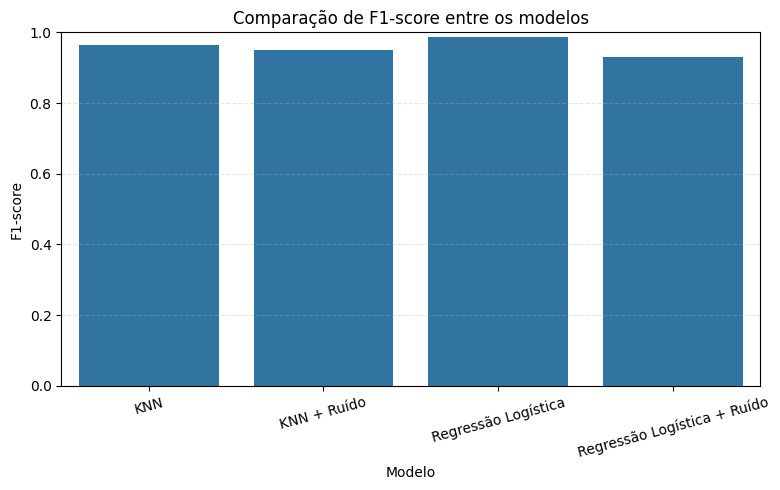

In [77]:
tabela_comparativa = pd.concat([
    resultados_knn,
    resultados_knn_noisy,
    resultados_logreg,
    resultados_logreg_noisy
], ignore_index=True)

print("📋 Comparação final entre todos os modelos:")
display(tabela_comparativa)

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='F1-score', data=tabela_comparativa)
plt.title('Comparação de F1-score entre os modelos')
plt.ylabel('F1-score')
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### 🧠 Discussão e Escolha do Modelo Final

Após a análise comparativa entre os modelos, observou-se que todos apresentaram bons desempenhos, mas com diferenças relevantes, especialmente quando os dados foram perturbados com ruído. O modelo de Regressão Logística manteve resultados consistentes tanto com dados limpos quanto com ruído, se destacado em métricas cruciais como recall e F1-scor - particularmente importantes em um contexto de diagnóstico médico, onde falsos negativos podem ter consequências graves. Em contrapartida, o modelo KNN demonstrou boa performance em condições ideais, mas revelou maior sensibilidade a variações nos dados, o que pode comprometer sua robustez em aplicações reais. Além da performance técnica, a Regressão Logística oferece maior interpretabilidade e escalabilidade, facilitando sua adoção em ambientes clínicos. Diante desses fatores - desempenho superior nas métricas mais relevantes, estabilidade frente a ruído e maior clareza na tomada de decisão -, concluímos que a Regressão Logística representa a melhor escolha para este caso de diagnóstico automatizado de câncer de mama.